## Data Loading

In [1]:
import pandas as pd
dataframe = pd.read_csv('/kaggle/input/suicide-watch/Suicide_Detection.csv')
dataframe.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [2]:
suicide = dataframe[dataframe['class']=='suicide']
non_suicide = dataframe[dataframe['class']== 'non-suicide']
suicide = suicide.head(50000)
non_suicide = non_suicide.head(50000)
dataframe = pd.concat([suicide,non_suicide])

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99822
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   text        100000 non-null  object
 2   class       100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


## Data Preprocessing

### Check for missing value

In [4]:
dataframe.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

### Process with text hammer and nltk

In [5]:
!pip install text_hammer --no-deps
import text_hammer as th

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
lists = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
stopwords_list = ['i','I', 'am', 'is','are','this','that','then','those','have','has','it','can','could','the','had','was','were','been','them','what',
                  'yet', 'though', 'wherein', 'really', 'show', 'then', 'rather', 'same', 'con', 'call', 'is', 'twenty', 'side', 'go', 'namely',
                  'every', 'top', 'for', "'m", 'with', 'either', 'because', 'two', 'well', 'when', 'those', 'under', 'thin', 'amount', 'upon', 
                  'kg', 'the', "that'll", 'ca', 'even', 'very', 'into', 'by', '‘m', 'keep', 'although', 'done', 'bottom', 'detail', 'whatever', 
                  'from', 'formerly', 'these', 'enough', 'twelve', 'of', 'too', 'already', 'move', 'something', 'few', 'nothing', 'they', 'does',
                  'us', 'next', 'cry', 'but', 'eight', '‘s', 'however', 'four', "'ll", 'has', 'over', 'someone', 'afterwards', 'myself', 'have',
                  'would', 'anywhere', 'hereupon', 'using', 'everything', 'his', 'put', 'many', 'more', 'within', 'which', 'describe', 'thereby',
                  'nine', 'elsewhere', 'other', 'he', 'if', 'per', 'your', 's', 'be', 'than', 'now', 'sometime', 'herein', 'why', '‘d', 'whereas',
                  'behind', 'couldnt', 'de', "'re", 'least', 'latter', 'whereafter', 'part', 'after', 'front', 'interest', "you'd", 'whose', 'fire',
                  'sincere', 'down', 'to', 'whence', 'ours', "'s", 'all', 'noone', 'just', 'anyhow', 'ie', 'having', 'her', 'been', 'get', 'former', 
                  'throughout', 'above', '’d', 'cannot', 'almost', 'do', 'quite', 'seem', 'give', 'first', 'several', 'also', 'seems', 'became', '’m',
                  'sixty', 'anyway', '‘re', 'on', "you're", 'onto', 'co', 'third', 'fifty', 'had', 'seemed', '’s', 'yourselves', 'until', 'an', 'mine',
                  'across', 'sometimes', 'hereby', 'eleven', 'might', 'mostly', 'un', 'i', "'d", 'itself', 'most', 'beforehand', 'five', 'beyond',
                  'herself', "you've", 'unless', 'regarding', 'there', 'doesn', 'while', 'whoever', "should've", 'whereupon', 'name', 'further', 'o', 
                  'nobody', 'whereby', 'others', 'between', 'thus', 'any', "you'll", 'found', 'amongst', 'hers', 'wherever', 'ltd', 'still', 'somehow',
                  'often', 'km', 'becoming', 'six', 'can', "'ve", 'make', 'hence', 'around', 'both', 'our', 'along', 'latterly', 'please', 'via', 'whole',
                  'system', 've', 'd', 'you', 'themselves', 'here', 'used', 'in', 'forty', 'each', 'find', 'during', 'ain', 'ten', 'him', 'nevertheless',
                  "she's", 'me', 'them', 'ma', 'meanwhile', 'and', 'y', 'did', 'fifteen', 'serious', '’re', "it's", '’ll', 'that', 'alone', 'together', 
                  'where', 'hereafter', 'once', 'himself', 'could', 'made', 'among', 'whom', 'cant', 'doing', 'again', 'therefore', 'beside', 'hundred',
                  'three', 'etc', 'moreover', 'various', 'may', 'since', 'always', 'seeming', 'toward', 'are', 'll', 'everywhere', 'a', 'empty', 'yours',
                  'theirs', 'back', 'else', 'own', 'as', 'somewhere', 'bill', '‘ll', 're', 'through', 'last', 'nowhere', 'what', 'take', 'computer',
                  'yourself', 'eg', 'perhaps', 'thereupon', 'ourselves', 'against', 'inc', 'she', 'whether', 'their', 'm', 'such', 'thick', 'anything',
                  '’ve', 'neither', 'none', 'amoungst', 'one', 'were', 'thru', 'am', 'about', 'without', 'up', 'otherwise', 'except', 'who', 'due',
                  'thereafter', 'ever', 'much', 'out', 'how', 'whenever', 'before', 'it', 'some', 'being', 'mill', 'or', 'its', 'will', 'become',
                  'besides', 'say', 'therein', 'another', 'see', 'anyone', 'becomes', 'never', 'towards', 'everyone', 'below', 'full', 'my', 'only', 
                  'fill', 'we', 'should', 'thence', 'indeed', 'this', 'was', 'less', 'so', 't', 'at', 'must', 'whither', 'off','whose','whom','who','do','did','does'
]

### Remove stopwords, emails, link, special char, and Lowercase all the text

In [8]:
%%time
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords_list:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [9]:
dataframe['text'] = dataframe['text'].apply(remove_stopwords)
dataframe.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently left wife ...,suicide
3,8,need helpjust help im crying hard,suicide
4,9,"’ lostHello , Adam ( 16 ) ’ struggling years ’...",suicide
5,11,Honetly idkI dont know im . feel like . All fe...,suicide
6,12,[ Trigger warning ] Excuse self inflicted burn...,suicide


In [10]:
%%time
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)

CPU times: user 474 µs, sys: 0 ns, total: 474 µs
Wall time: 444 µs


In [11]:
dataframe = text_preprocessing(dataframe, 'text')

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/text_hammer/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

## Tokenization

In [12]:
X = dataframe['text']
y = dataframe['class']

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
 # this means 20000 unique words can be taken 
tokenizer=Tokenizer(num_words= 20000,lower=True)
tokenizer.fit_on_texts(X)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=200,padding='post') # this makes the length of all numeric sequences equal 
X[0]

array([  395,   570,  2359,   104,   570,    27,  1157,   831,  1188,
         256,  1536,   353,    95,    90,   873,  2359,    42, 13915,
         399,    95,   141,   541, 12991,   210,   196,   116,     5,
          75,     9,  3427,   871,    29,   438,    88,   336,   432,
         151,   764,    38,   570,     3,   240,    61,  1157,   254,
          68,  1945,   600,   101,    16,   114,     1,   255,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [15]:
X.shape

(100000, 200)

In [16]:
import pickle

# Save tokenizer to file
with open('/kaggle/working/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Word2Vec

In [17]:
# pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [18]:
import numpy as np
from gensim.models import KeyedVectors
vector_size = 100
num_words = 20000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

## Model Building

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim.downloader as api
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Dense
from keras.layers import GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Input, BatchNormalization


In [20]:
from sklearn.model_selection import train_test_split
y=pd.get_dummies(dataframe['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [21]:
EMBEDDING_DIM = 100  # Dimension of word embeddings
MAX_NUM_WORDS = 20000  # Maximum number of unique words
MAX_SEQUENCE_LENGTH = 200  # Fixed sequence length for all input data
# Build the model
model = Sequential()

# Input layer
model.add(Input(shape=(X.shape[1],)))

# Embedding layer with pre-trained GloVe embeddings
model.add(Embedding(input_dim=MAX_NUM_WORDS,
                    output_dim=EMBEDDING_DIM,
                    weights=[gensim_weight_matrix],
                    trainable=False)) 

# Dropout layer
model.add(Dropout(0.2))

# GRU layer 1
model.add(GRU(100, return_sequences=True))

# Dropout layer
model.add(Dropout(0.2))

# GRU layer 2
model.add(GRU(100, return_sequences=True))

# Dropout layer
model.add(Dropout(0.2))

# GRU layer 3
model.add(GRU(100, return_sequences=False))

# BatchNormalization layer
model.add(BatchNormalization())

# Dropout layer
model.add(Dropout(0.3))

# Dense layer
model.add(Dense(64, activation='relu'))

# Dropout layer
model.add(Dropout(0.3))

# Output layer
model.add(Dense(y.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 200, 100)       │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 200, 100)       │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 100)            │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,794 (8.35 MB)

 Trainable params: 188,594 (736.70 KB)

 Non-trainable params: 2,000,200 (7.63 MB)

In [22]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [23]:
history_embedding = model.fit(X_train, y_train, 
                                epochs = 25, batch_size = 128, 
                                validation_data=(X_test, y_test),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/25
546/547 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5434 - loss: 0.6830
Epoch 1: val_accuracy improved from -inf to 0.50213, saving model to ./model.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.5436 - loss: 0.6828 - val_accuracy: 0.5021 - val_loss: 4.2301
Epoch 2/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8935 - loss: 0.2780
Epoch 2: val_accuracy improved from 0.50213 to 0.90110, saving model to ./model.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.8935 - loss: 0.2779 - val_accuracy: 0.9011 - val_loss: 0.2507
Epoch 3/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9135 - loss: 0.2266
Epoch 3: val_accuracy improved from 0.90110 to 0.91120, saving model to ./model.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9135 - loss: 0.2266 - val_accuracy: 0.9112 - val_loss: 0.2257
Epoch 4/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9195 - loss: 0.2068
Epoch 4: val_accuracy improved from 0.91

## Model Evaluation

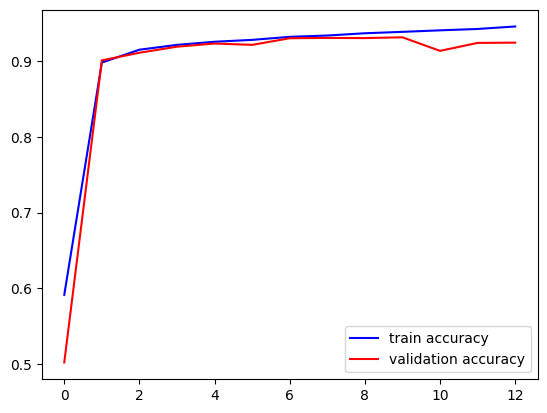

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

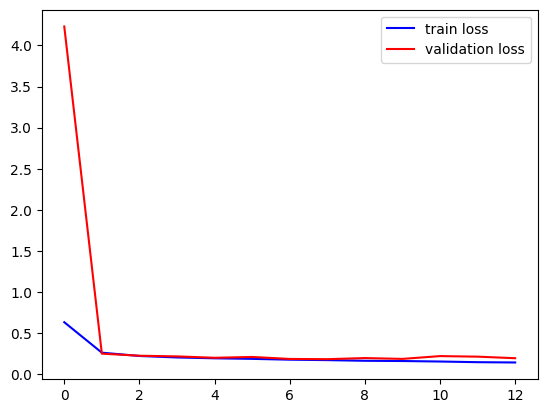

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(X_test)
y_pred.shape
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred
y_test = y_test.to_numpy()
y_test=np.argmax(y_test,axis = 1)
print(classification_report(y_test, y_pred))

938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     14945
           1       0.96      0.89      0.92     15055

    accuracy                           0.92     30000
   macro avg       0.93      0.92      0.92     30000
weighted avg       0.93      0.92      0.92     30000



## Predict New Data

In [27]:
# Teks baru untuk prediksi
new_data = ["i am happy "]
# Tokenisasi dan konversi teks ke dalam bentuk indeks kata
new_data_tokenized = tokenizer.texts_to_sequences(new_data)

# Padding untuk memastikan panjangnya sesuai dengan model
new_data_padded = pad_sequences(new_data_tokenized, maxlen=200, padding='post')

# Cek apakah padding dan tokenisasi bekerja dengan baik
print(new_data_padded)

[[629 616  64   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]


In [28]:
# Prediksi dengan model yang sudah dilatih
prediction = model.predict(new_data_padded)

# Menentukan kelas prediksi
predicted_class = np.argmax(prediction, axis=1)

# Mengambil probabilitas untuk kelas prediksi
predicted_prob = prediction[0][predicted_class[0]] * 100

# Output prediksi dan persentase
class_names = ['Not Suicidal', 'Suicidal']
print(f"Predicted class: {class_names[predicted_class[0]]}")
print(f"Prediction probability: {predicted_prob:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: Not Suicidal
Prediction probability: 93.62%
